# Introduction to AI / ML: Titanic - Machine Learning from Titanic Example (Preview)

Notebook by Head of ML Department: Mouafak Dakhlaoui

Welcome dear GDSC INSAT members to the first of many workshop notebooks! 🥳🥳

In this notebook we try to showcase some aspects of machine learning, mainly we divide the workflow into two parts for simplicity:

    1) Exploratory Data Analysis: in which we explore and vizualize our data to get insights. 🧐
    2) Model Building: in which we prepared our data, trained our model and evaluated it. 🏋️
    
Don't worry if the code looks a bit complicated, you will be able to do all of this by yourself in no time simply by attending our workshops, studying and practicing! 🤓
    
We use the Titanic - Machine Learning from Disaster competition dataset available at:  https://www.kaggle.com/competitions/titanic/data.

In [2]:
import numpy as np                         # Library for Matrix operations and linear algebra

import matplotlib.pyplot as plt            # Library for vizualization
import seaborn as sns
from matplotlib import style

import pandas as pd                        # Library for dealing with dataframes

plt.style.use('Solarize_Light2')

In [3]:
data = pd.read_csv('titanic_data\\train.csv')  # Load the csv file
data.head(5)                                   # Show the first 5 examples of the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(f'Number of examples / samples: {data.shape[0]}')
print(f'Number of features: {data.shape[1]}')
print('The target feature: Survived')

Number of examples / samples: 891
Number of features: 12
The target feature: Survived


## Exploratory Data Analysis

Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

Definition source: https://www.ibm.com/cloud/learn/exploratory-data-analysis

In [5]:
df = data.copy()          # Make a copy of the dataframe before data preprocessing / vizualization

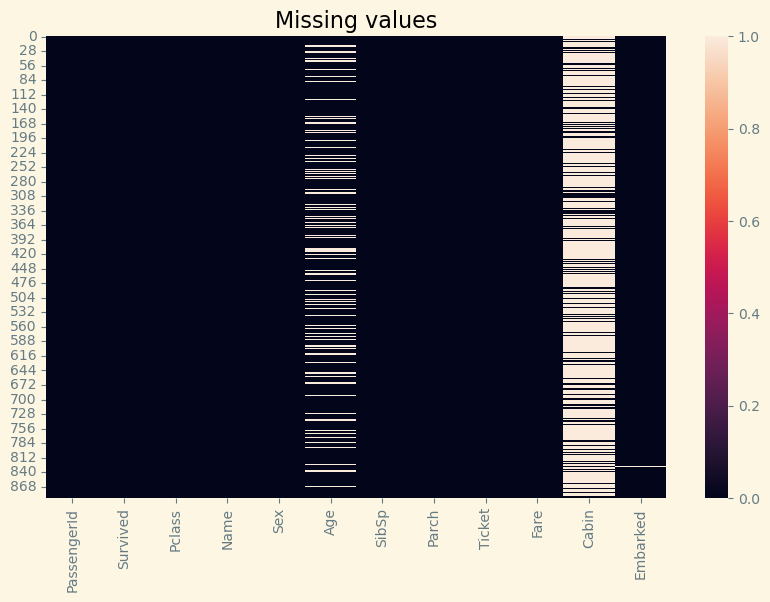

In [6]:
# Show missing data in a heatmap
plt.figure(figsize=(10, 6))
plt.title('Missing values')
sns.heatmap(df.isna())
plt.show()

In [7]:
# Show percentages of missing values for each feature
df.isna().mean(axis=0).sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

Let's drop the Cabin feature and drop rows of data where Age or Embarked are missing

We will drop PassengerId since it is simply an ID to uniquely identify each passenger

We will also drop the Name, SibSp, Parch, Ticket, Fare and Embarked to simplify the problem for the sake of giving a clear introduction.

In [8]:
df.drop(['Cabin', 'PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked'],
                   axis=1, inplace=True)             # Drop columns
df.dropna(axis=0, inplace=True)           # Drop rows where there are missing data

In [9]:
df.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [10]:
print(f'Number of examples / samples: {df.shape[0]}')
print(f'Number of features: {df.shape[1]}')

Number of examples / samples: 714
Number of features: 4


In [11]:
df.describe()    # the method describe gives some descriptive statistics of the dataframe

,Survived,Pclass,Age
count,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118
std,0.491460,0.838250,14.526497
min,0.000000,1.000000,0.420000
25%,0.000000,1.000000,20.125000
50%,0.000000,2.000000,28.000000
75%,1.000000,3.000000,38.000000
max,1.000000,3.000000,80.000000


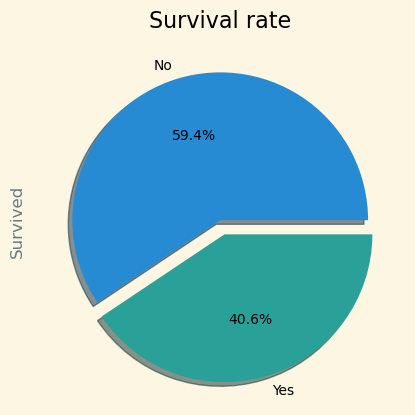

In [11]:
# percentage of the passengers that survive
df['Survived'].map({0: 'No', 1: 'Yes'}).value_counts().plot.pie(title='Survival rate',
                                                                autopct='%1.1f%%',
                                                                explode=(0, 0.1),
                                                                shadow=True)
plt.show()

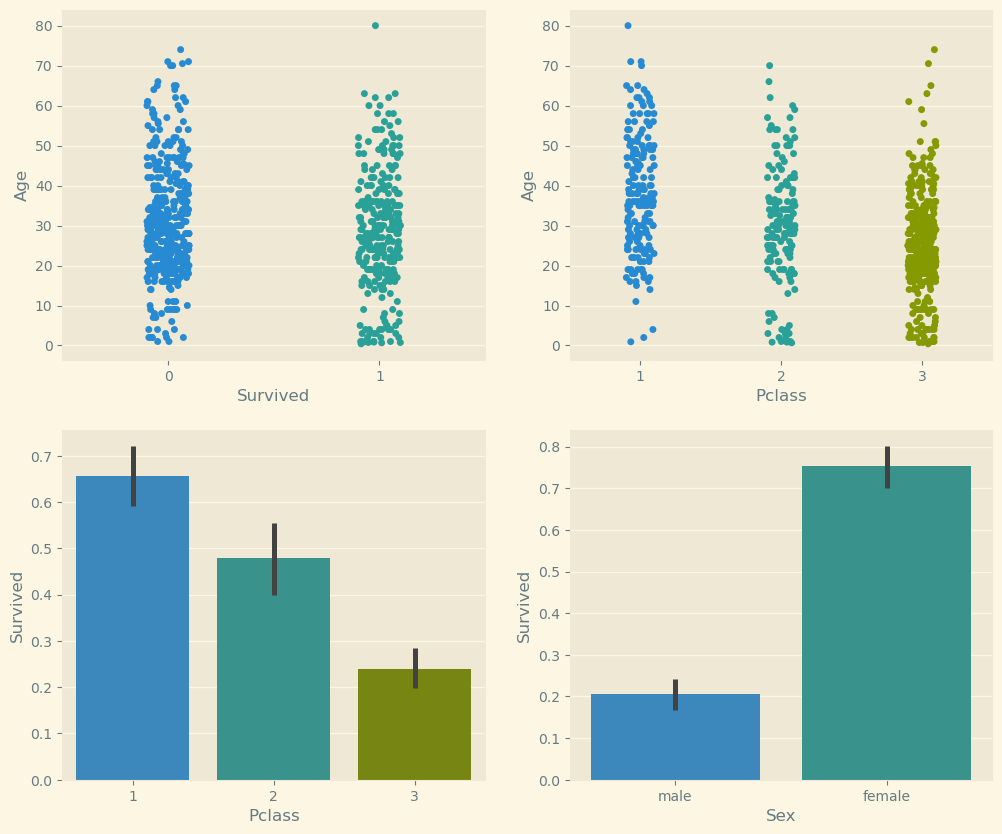

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))
sns.stripplot(data=df, x='Survived', y='Age', ax=axes[0, 0])
sns.stripplot(data=df, x='Pclass', y='Age',  ax=axes[0, 1])
sns.barplot(data=df, x='Pclass', y='Survived', ax=axes[1, 0])
sns.barplot(data=df, x='Sex', y='Survived', ax=axes[1, 1])
plt.show()

Pclass, Sex and Age have an effect on survival rate

## Build a simple model

### Preprocess Data

First, we need to transform the "Sex" column into a numerical column since machine learning generally algorithms only deal with numbers.

In [13]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

We will now split our data into training_data and testing_data to evaluate our classifier later, we will use a 80 / 20 split

In [14]:
from sklearn.model_selection import train_test_split


train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

We now need to scale the "Pclass" and "Age" columns to have values in the same scale.

In [15]:
maximum_age = train_df['Age'].max()
print(f'The oldest passenger in the training set is {int(maximum_age)} years old.')

The oldest passenger in the training set is 80 years old.


In [16]:
def scale_df(df):
    df_copy = df.copy()
    df_copy['Age'] = df_copy['Age'] / maximum_age
    df_copy['Pclass'] = (df_copy['Pclass'] - 1) / 2
    return df_copy

In [17]:
train_df = scale_df(train_df)
test_df = scale_df(test_df)

In [18]:
# Split both the train and test sets into X (features) and y (target)
X_train, y_train = train_df.drop('Survived', axis=1), train_df['Survived']
X_test, y_test = test_df.drop('Survived', axis=1), test_df['Survived']

We are now ready to train our first classification model!

### Model Training and Evaluation

In [19]:
from sklearn.neighbors import KNeighborsClassifier    # import knn classifier (machine learning algorithm)

In statistics, the k-nearest neighbors algorithm (k-NN) is a non-parametric supervised learning method first developed by Evelyn Fix and Joseph Hodges in 1951, and later expanded by Thomas Cover. It is used for classification and regression. In both cases, the input consists of the k closest training examples in a data set. The output depends on whether k-NN is used for classification or regression:

- In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
- In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.

Definition source: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

In [20]:
clf_model = KNeighborsClassifier(n_neighbors=6)    # initialize model with constructor

clf_model.fit(X_train, y_train)                    # fit (train) the classifier on our training data

score = clf_model.score(X_test, y_test)            # evaluate the model on the testing data

print(f'Model classification accuracy: {score}')

Model classification accuracy: 0.7972027972027972


We can now save our model

In [21]:
import pickle            # pickle is used for serializing and de-serializing Python object structures

file_path = 'saved_model\\my_model.pkl'         # the model's relative path
with open(file_path, 'wb') as f:
    pickle.dump(clf_model, f)